# **SpaceX  Falcon 9 First Stage Landing Prediction**


## **Objectives**

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### **Import Libraries and Define Functions**


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Exploratory Data Analysis**


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [33]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, we'll examine the impact of FlightNumber (which represents consecutive launch attempts) and PayloadMass on the launch outcome.

By creating a visual representation of FlightNumber versus PayloadMass, and overlaying the launch results, we can observe that a higher flight number tends to correlate with a higher likelihood of successful first stage landing. Additionally, it appears that the heavier the payload, the lower the chances of the first stage returning successfully.

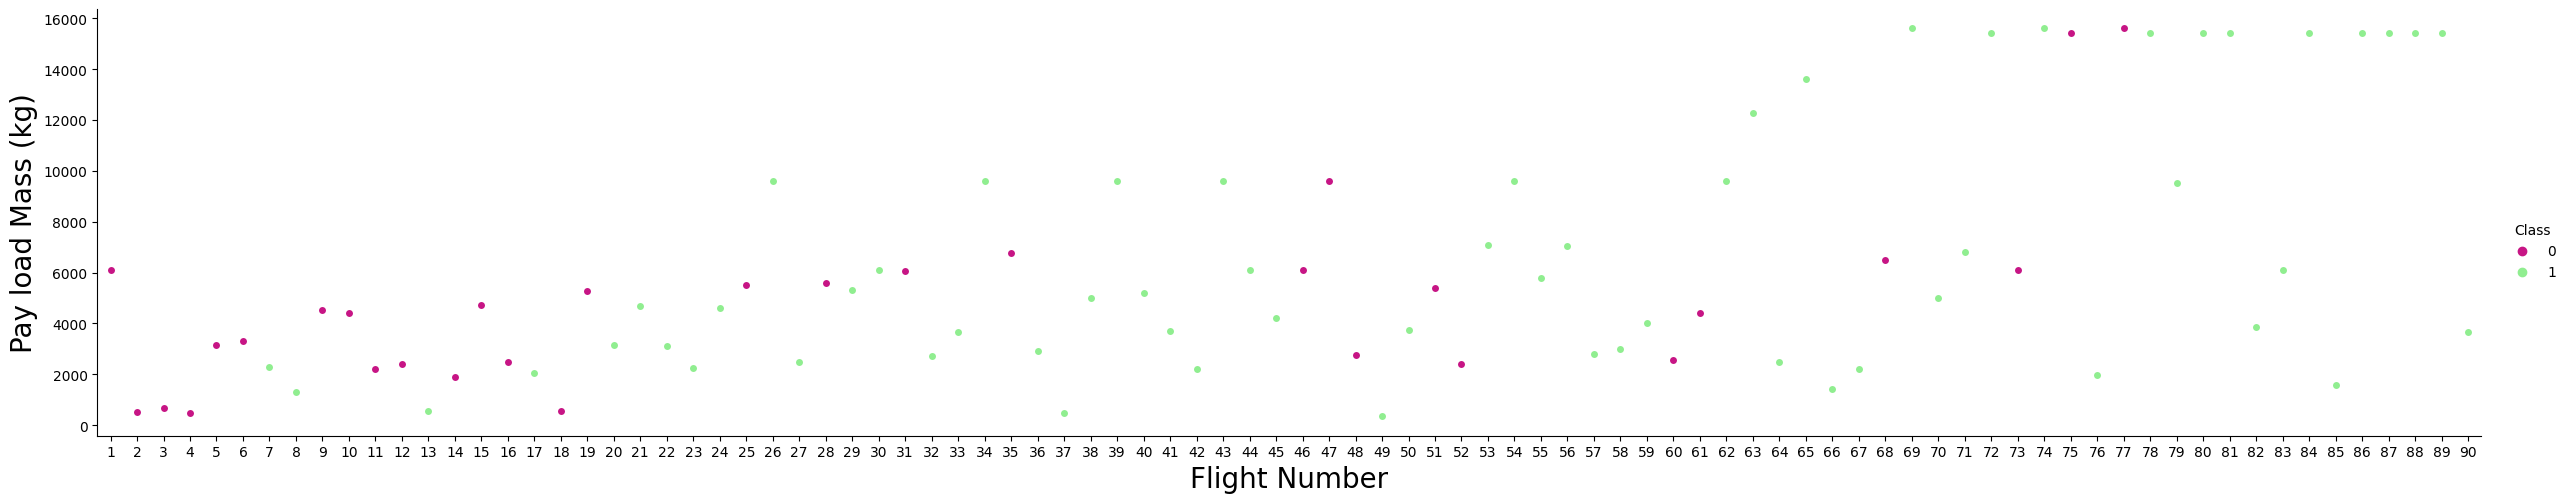

In [42]:
custom_palette = {0:  "#C71585", 1: "lightgreen"}  # Change the colors as desired
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5,palette=custom_palette)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

In [50]:
# Group by LaunchSite and Class, then count the occurrences for each combination
grouped_counts = df.groupby(['LaunchSite', 'Class']).size().unstack(fill_value=0)
grouped_counts.reset_index(inplace=True)
grouped_counts.columns = ['LaunchSite', 'Class=0', 'Class=1']
grouped_counts['SuccessRatio']=grouped_counts['Class=1']/(grouped_counts['Class=1']+grouped_counts['Class=0'])
grouped_counts

,LaunchSite,Class=0,Class=1,SuccessRatio
0,CCAFS SLC 40,22,33,0.600000
1,KSC LC 39A,5,17,0.772727
2,VAFB SLC 4E,3,10,0.769231


We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### **TASK 1: Relationship between Flight Number and Launch Site**


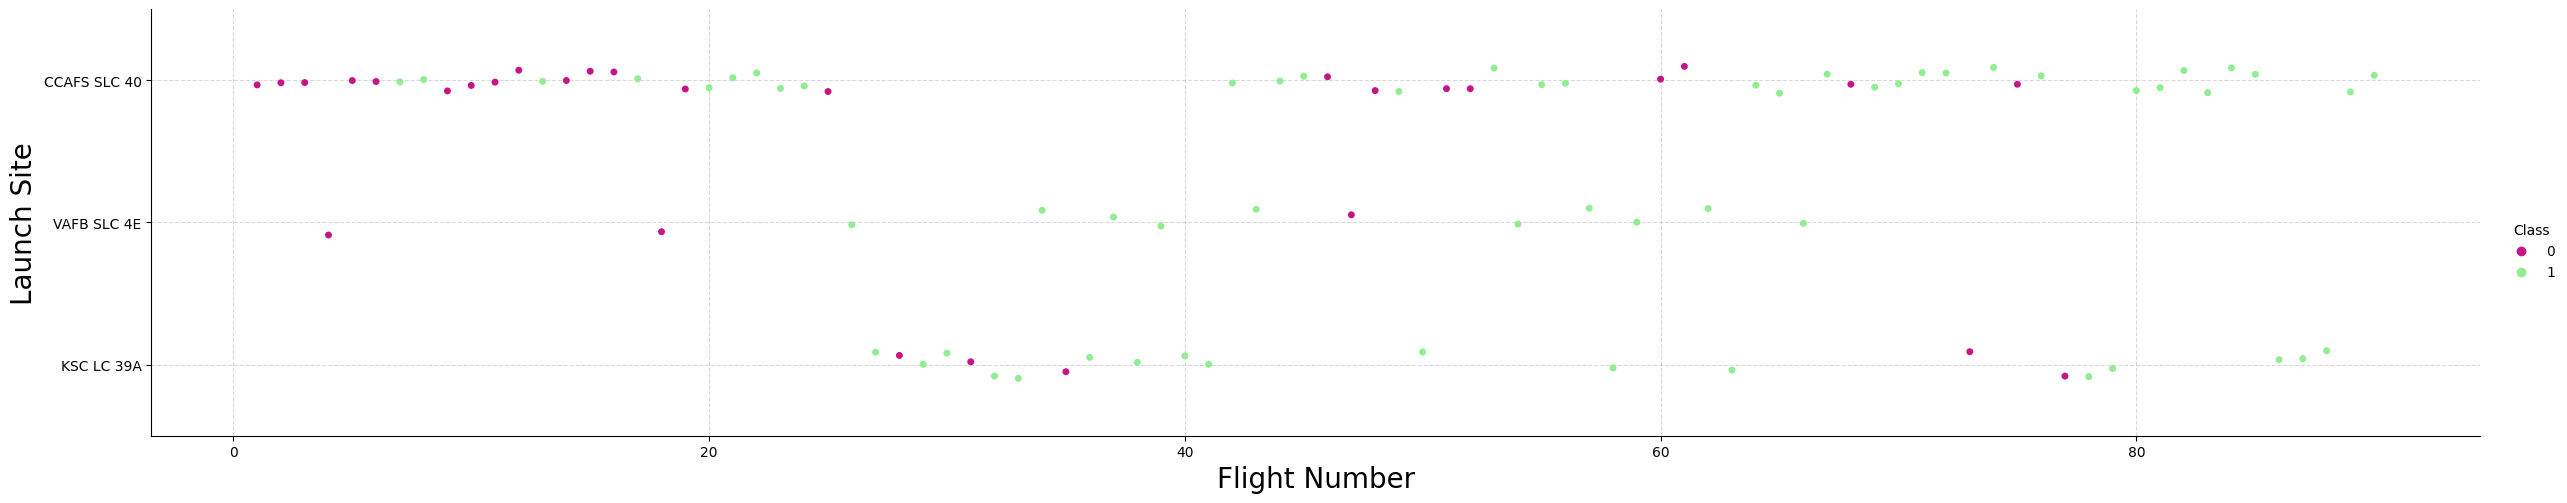

In [53]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
cat_plot =sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5,palette=custom_palette)
cat_plot.ax.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### **TASK 2: Relationship between Payload and Launch Site**


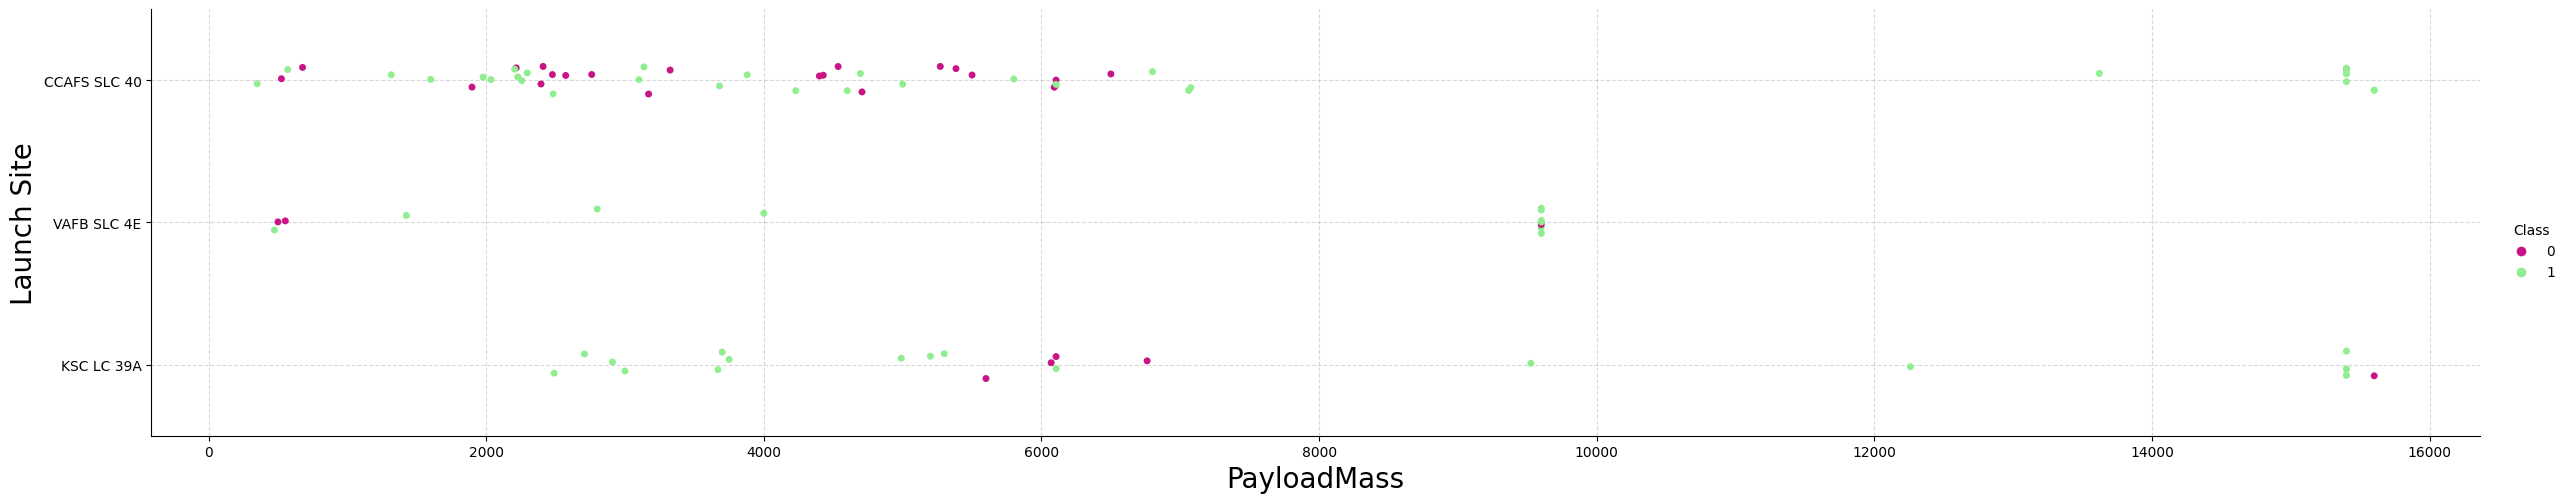

In [56]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
cat_plot=sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5 ,palette=custom_palette)
cat_plot.ax.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Upon examining the scatter plot chart of payload versus launch site, it becomes apparent that for the Vandenberg Air Force Base - Space Launch Complex (VAFB-SLC), no rockets have been launched with heavy payload masses exceeding 10,000 kilograms.


### **TASK  3: Relationship between success rate of each orbit type**


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [22]:
# check head of dataframe
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [65]:
# Group by LaunchSite and Class, then count the occurrences for each combination
grouped_counts = df.groupby(['Orbit', 'Class']).size().unstack(fill_value=0)
grouped_counts.reset_index(inplace=True)
grouped_counts.columns = ['Orbit', 'Class=0', 'Class=1']
grouped_counts['SuccessRatio']=grouped_counts['Class=1']/(grouped_counts['Class=1']+grouped_counts['Class=0'])
grouped_counts.sort_values(by='SuccessRatio',ascending=False)


,Orbit,Class=0,Class=1,SuccessRatio
0,ES-L1,0,1,1.000000
1,GEO,0,1,1.000000
3,HEO,0,1,1.000000
9,SSO,0,5,1.000000
10,VLEO,2,12,0.857143
5,LEO,2,5,0.714286
6,MEO,1,2,0.666667
7,PO,3,6,0.666667
4,ISS,8,13,0.619048
2,GTO,13,14,0.518519


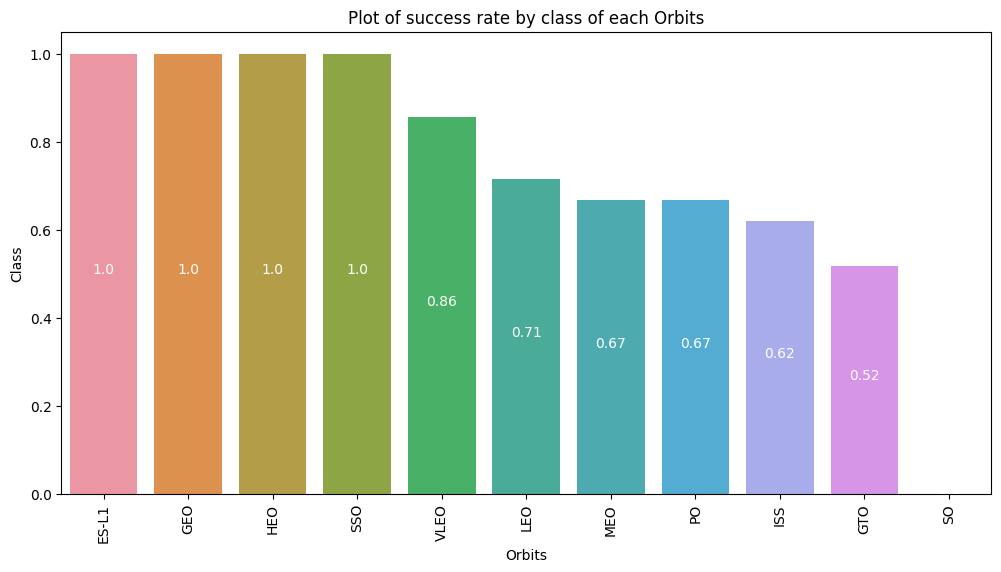

In [71]:
# Use groupby method on Orbit column and get the mean of Class column
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90)
# Add mean values to the inside of each bar
for index, row in grouped_orbits.iterrows():
    ax.text(index, row['Class'] / 2, round(row['Class'], 2), color='white', ha='center', fontsize=10,fontweight='medium')

plt.show()

##### Analyze the ploted bar chart try to find which orbits have high success rate.

Looking at the plot, we can see that **ES-L1, GEO, HEO, SSO**, and **VLEO** are the Orbits that have high success rate. The `SO` has the least success rate amongst the orbits. But you should be carefull about, **ES-L1, GEO, HEO** and **SSO** have only one try. 

### **TASK  4: Relationship between FlightNumber and Orbit type**


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


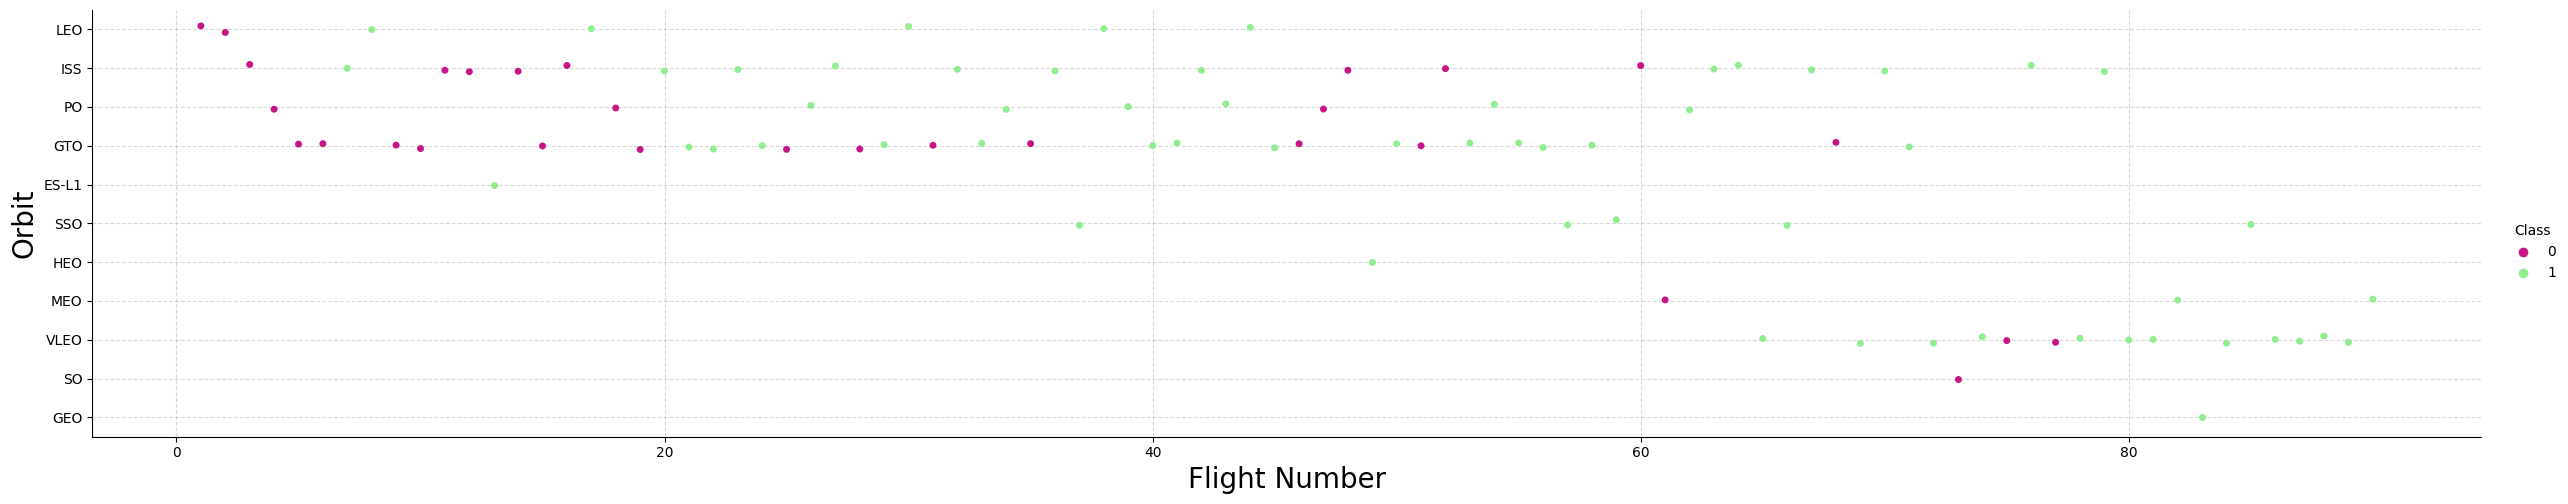

In [72]:
cat_plot=sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5 ,palette=custom_palette)
cat_plot.ax.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the **LEO** orbit the Success appears **related to** the number of flights; on the other hand, there seems to be **no relationship** between flight number when in **GTO** orbit.


### **TASK  5: Relationship between Payload and Orbit type**


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


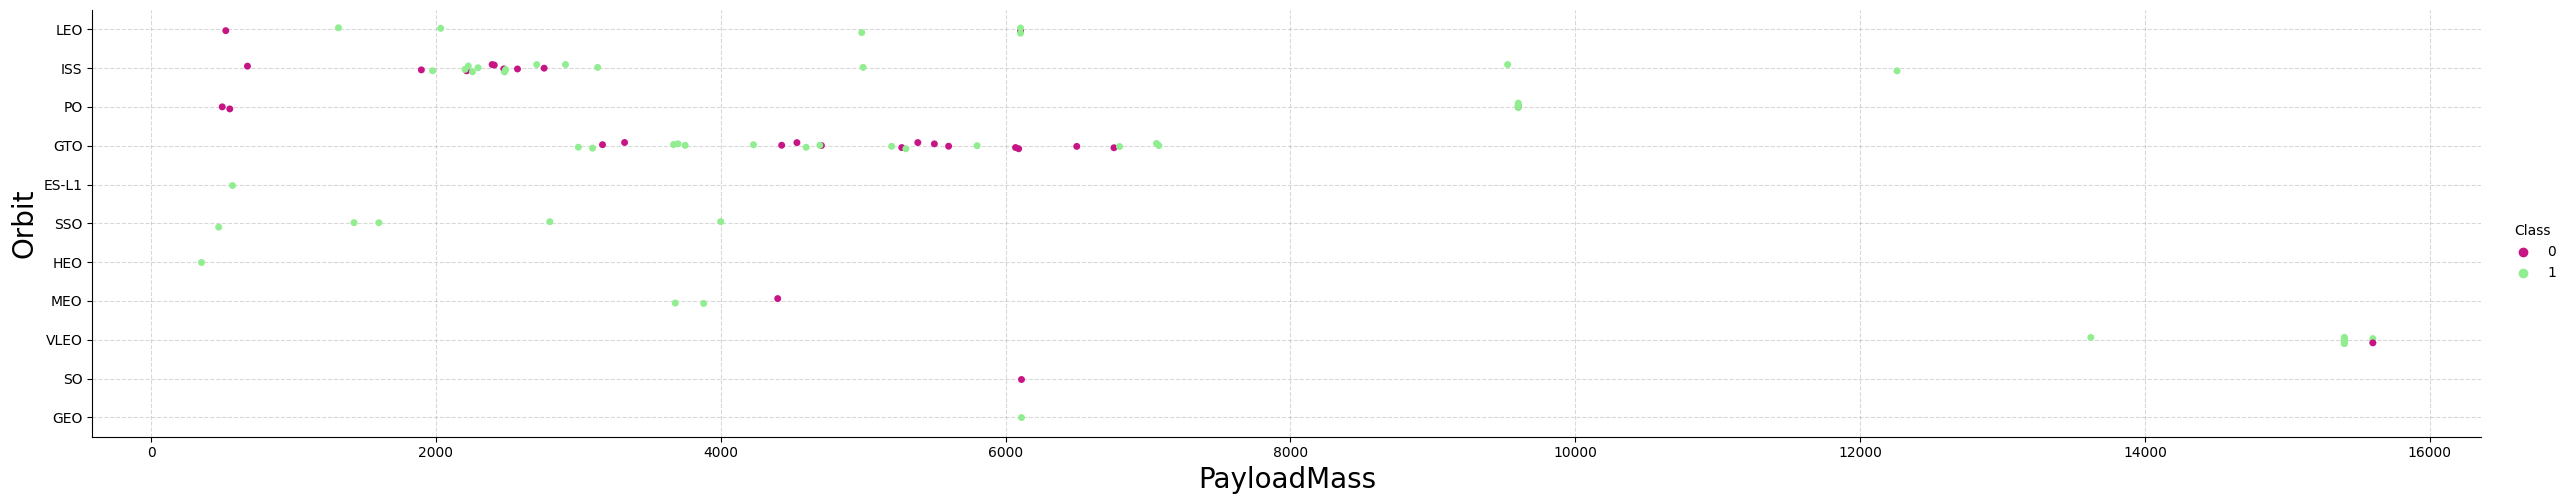

In [73]:
cat_plot=sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5 ,palette=custom_palette)
cat_plot.ax.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With substantial payloads, successful landings or high landing success rates are more prevalent for **PO**, **LEO**, and **ISS** missions. However, in the case of **GTO** missions, it is more challenging to differentiate between successful and unsuccessful landings, as both positive and negative outcomes are present in this category.


### **TASK  6: Visualize the launch success yearly trend**


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [74]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [76]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df_copy = df.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(df['Date']).year


In [80]:
# Group by LaunchSite and Class, then count the occurrences for each combination
grouped_counts = df_copy.groupby(['Extracted_year', 'Class']).size().unstack(fill_value=0)
grouped_counts.reset_index(inplace=True)
grouped_counts.columns = ['Extracted_year', 'Class=0', 'Class=1']
grouped_counts['SuccessRatio']=grouped_counts['Class=1']/(grouped_counts['Class=1']+grouped_counts['Class=0'])
grouped_counts

,Extracted_year,Class=0,Class=1,SuccessRatio
0,2010,1,0,0.000000
1,2012,1,0,0.000000
2,2013,3,0,0.000000
3,2014,4,2,0.333333
4,2015,4,2,0.333333
5,2016,3,5,0.625000
6,2017,3,15,0.833333
7,2018,7,11,0.611111
8,2019,1,9,0.900000
9,2020,3,16,0.842105


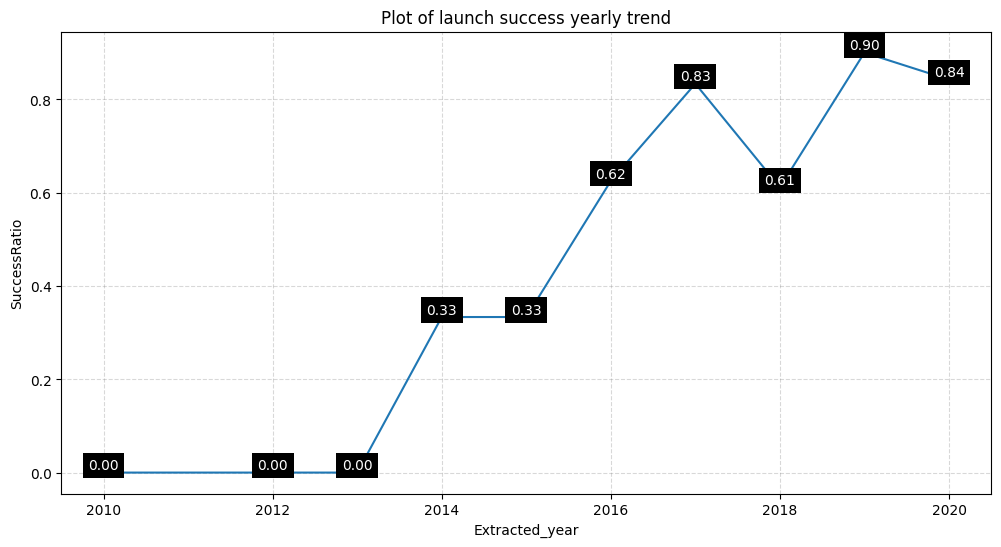

In [91]:
fig, ax=plt.subplots(figsize=(12,6))
line_plot=sns.lineplot(data=grouped_counts, x='Extracted_year', y='SuccessRatio')
ax.grid(True, linestyle='--', which='both', color='grey', alpha=0.3)
# Loop through the data points to annotate the mean values
# Loop through the data points to annotate the mean values with adjusted position and background color
for index, row in grouped_counts.iterrows():
    ax.text(row['Extracted_year'], row['SuccessRatio'], f"{row['SuccessRatio']:.2f}",
            fontsize=10, ha='center', va='bottom', color='white', bbox=dict(facecolor='black', edgecolor='none', alpha=1))

plt.title('Plot of launch success yearly trend');
plt.show()

You can observe the positive trend since 2013.


## **Features Engineering**


At this stage, you should have gained initial understanding of how each significant variable influences the success rate. We will identify and select the features to be utilized for predicting success in upcoming modules.


In [29]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### **TASK  7: Create dummy variables to categorical columns**


Use the get_dummies function and the features dataframe to apply OneHotEncoder to the columns 'Orbits', 'LaunchSite', 'LandingPad', and 'Serial'. Assign the resulting values to the variable 'features_one_hot' and display the results using the 'head' method. The resulting dataframe should contain all features, including the encoded ones.


In [92]:
features_one_hot = pd.get_dummies(features, drop_first=True)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **TASK  8: Cast all numeric columns to `float64`**


Now that our features_one_hot dataframe **only contains numbers** cast the entire dataframe to variable type float64.

In [93]:
features_one_hot =  features_one_hot.astype(float)
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 76, dtype: object

In [32]:
# export csv
features_one_hot.to_csv('EDAwithDataVisualization.csv', index=False)

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.
